In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import os

import numpy as np
import pandas as pd
import tensorflow as tf

import atecml.data

from contextlib import contextmanager
from tqdm import tqdm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN

plt.style.use('ggplot')

In [7]:
train_df,test_df = atecml.data.load()
predictors = [x for x in train_df.columns if x not in atecml.data.NOT_FEATURE_COLUMNS]
target = 'Fraud'

In [264]:
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegressionCV
#build Models...
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

feature_list = {}
feature_list[0] = predictors
feature_list[1] = ['f7', 'f248', 'f238', 'f210', 'f5', 'f218', 'f6', 'f215', 'f82', 'f247', 'f234', 'f244',  'f237', 'f245', 'f246', 'f18', 'f253', 'f243', 'f217', 'f236']
feature_list[2] = ['f7', 'f248', 'f238', 'f210', 'f5', 'f218', 'f6', 'f215', 'f82', 'f247', 'f234', 'f244',  'f237', 'f245', 'f246', 'f18', 'f253', 'f243', 'f217', 'f236', 'f222', 'f15', 'f106', 'f216', 'f17', 'f235', 'f86', 'f84', 'f85', 'f242', 'f19', 'f208', 'f14', 'f4', 'f209', 'f263', 'f207', 'f233', 'f101', 'f252', 'f204', 'f214', 'f83', 'f58', 'f57', 'f163', 'f231', 'f240', 'f53', 'f164']
feature_list[3] = ['f7', 'f248', 'f238', 'f210', 'f5', 'f218', 'f6', 'f215', 'f82', 'f247', 'f234', 'f244',  'f237', 'f245', 'f246', 'f18', 'f253', 'f243', 'f217', 'f236', 'f222', 'f15', 'f106', 'f216', 'f17', 'f235', 'f86', 'f84', 'f85', 'f242', 'f19', 'f208', 'f14', 'f4', 'f209', 'f263', 'f207', 'f233', 'f101', 'f252', 'f204', 'f214', 'f83', 'f58', 'f57', 'f163', 'f231', 'f240', 'f53', 'f164', 'f262', 'f226', 'f206', 'f221', 'f225', 'f11', 'f232', 'f251', 'f230', 'f25', 'f229', 'f162', 'f54', 'f52', 'f105', 'f205', 'f241', 'f223', 'f81', 'f161', 'f249', 'f49', 'f224', 'f63', 'f27', 'f34', 'f32', 'f21', 'f220', 'f80', 'f51', 'f8', 'f227', 'f12', 'f35', 'f48', 'f55', 'f239', 'f219', 'f213', 'f30', 'f100', 'f103', 'f211', 'f185', 'f50', 'f183', 'f28', 'f228', 'f278']

model = {}

gbdt_params = {'boosting_type': 'gbdt',
                      'max_depth': 50,
                      'n_estimators': 100,
                      'use_missing' : True,
                      'categorical_feature': 4,
                      'is_unbalance': True,
                      'seed': 42,
                      'nthread': -1}
goss_params = {'boosting_type': 'goss',
                      'max_depth': 50,
                      'n_estimators': 100,
                      'use_missing' : True,
                      'categorical_feature': 4,
                      'is_unbalance': True,
                      'seed': 42,
                      'nthread': -1}

dart_params = {'boosting_type': 'dart',
                      'max_depth': 50,
                      'n_estimators': 100,
                      'use_missing' : True,
                      'categorical_feature': 4,
                      'is_unbalance': True,
                      'seed': 42,
                      'nthread': -1}

model["GBDT"] = LGBMClassifier(**gbdt_params)
model["GOSS"] = LGBMClassifier(**goss_params)
#model["DART"] = LGBMClassifier(**dart_params)


In [265]:
def model_load(model_name):
    model_cache_name = './'+model_name+'.model'
    if (os.path.exists(model_cache_name)):
        clf = joblib.load(model_cache_name)
    else:
        print('ERROR...............')
    return clf
        

In [300]:
train_model =[]
for idx in range(0,2):
    for item in model.keys():
        for target in ['Normal','Fraud']:
        #for target in ['Fraud']:
            for feature_grp_idx in range(0,4):
                train_id = item + '__'+target +'__'+str(idx) +'__' + str(feature_grp_idx)
                train_model.append(train_id)

In [301]:
train_model

['GOSS__Normal__0__0',
 'GOSS__Normal__0__1',
 'GOSS__Normal__0__2',
 'GOSS__Normal__0__3',
 'GOSS__Fraud__0__0',
 'GOSS__Fraud__0__1',
 'GOSS__Fraud__0__2',
 'GOSS__Fraud__0__3',
 'GBDT__Normal__0__0',
 'GBDT__Normal__0__1',
 'GBDT__Normal__0__2',
 'GBDT__Normal__0__3',
 'GBDT__Fraud__0__0',
 'GBDT__Fraud__0__1',
 'GBDT__Fraud__0__2',
 'GBDT__Fraud__0__3',
 'GOSS__Normal__1__0',
 'GOSS__Normal__1__1',
 'GOSS__Normal__1__2',
 'GOSS__Normal__1__3',
 'GOSS__Fraud__1__0',
 'GOSS__Fraud__1__1',
 'GOSS__Fraud__1__2',
 'GOSS__Fraud__1__3',
 'GBDT__Normal__1__0',
 'GBDT__Normal__1__1',
 'GBDT__Normal__1__2',
 'GBDT__Normal__1__3',
 'GBDT__Fraud__1__0',
 'GBDT__Fraud__1__1',
 'GBDT__Fraud__1__2',
 'GBDT__Fraud__1__3']

In [302]:
trained_model_list =[]
with atecml.data.timer('Classification: Model Training'):
    for train_id in tqdm(range(len(train_model))):
        fit_model = model_load(train_model[train_id])
        trained_model_list.append(fit_model)

 12%|█▎        | 4/32 [00:00<00:00, 31.82it/s]

[2018-06-25 08:40:10][Classification: Model Training] Begin ...


100%|██████████| 32/32 [00:01<00:00, 24.97it/s]

[2018-06-25 08:40:12][Classification: Model Training] End   ...[Elapsed: 1.29s]


In [303]:
verify_df = atecml.data.load_train()
verify_data = atecml.data.filter_date(verify_df,start_date='2017-10-16',end_date='2018-10-15')
verify_data.reset_index(drop=True,inplace=True)

In [304]:
verify_df =pd.DataFrame()
verify_proba =pd.DataFrame()
with atecml.data.timer('Validation: Modelfit'):
    for idx in tqdm(range(len(trained_model_list))):
        clf = trained_model_list[idx]
        model_params = train_model[idx].split('__')
        f_idx = int(model_params[3])
        select_feature = feature_list[f_idx]
        y_predict = clf.predict_proba(verify_data[select_feature])
        verify_proba['n1_'+str(idx)] = pd.DataFrame(y_predict)[0]
        verify_proba['n2_'+str(idx)] = pd.DataFrame(y_predict)[1]
        if (model_params[1] == 'Fraud'):
            verify_df[idx] = pd.DataFrame(y_predict)[1]
        else:
            verify_df[idx] = pd.DataFrame(y_predict)[0]

  0%|          | 0/32 [00:00<?, ?it/s]

[2018-06-25 08:40:16][Validation: Modelfit] Begin ...


100%|██████████| 32/32 [01:33<00:00,  2.66s/it]

[2018-06-25 08:41:50][Validation: Modelfit] End   ...[Elapsed: 93.77s]


In [305]:
verify_proba_4dnn = pd.concat([verify_proba,verify_data['Fraud']],axis=1)
verify_proba_4dnn.to_pickle('./verify_proba.dat')
verify_df['mean']=verify_df.T.mean()

0.3770411568409344


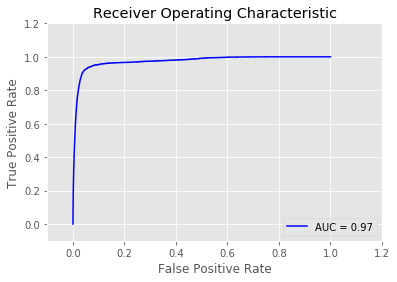

In [306]:
a,b,c=atecml.data.accuracy_validation(verify_data[target],verify_df['mean'])

In [276]:
#build Train_Proba Matrix for DNN:
train_df = atecml.data.load_train()
train_df = atecml.data.filter_date(train_df,start_date='2016-10-16',end_date='2017-10-15')
train_proba =pd.DataFrame()
train_proba_4ana =pd.DataFrame()
with atecml.data.timer('Validation: Modelfit'):
    for idx in tqdm(range(len(trained_model_list))):
        clf = trained_model_list[idx]
        model_params = train_model[idx].split('__')       
        f_idx = int(model_params[3])
        select_feature = feature_list[f_idx]
        y_predict = clf.predict_proba(train_df[select_feature])
        train_proba['n1_'+str(idx)] = pd.DataFrame(y_predict)[0]
        train_proba['n2_'+str(idx)] = pd.DataFrame(y_predict)[1]
        if (model_params[1] == 'Fraud'):
            train_proba_4ana[idx] = pd.DataFrame(y_predict)[1]
        else:
            train_proba_4ana[idx] = pd.DataFrame(y_predict)[0]        

  0%|          | 0/16 [00:00<?, ?it/s]

[2018-06-25 07:51:58][Validation: Modelfit] Begin ...


100%|██████████| 16/16 [01:27<00:00,  4.90s/it]

[2018-06-25 07:53:25][Validation: Modelfit] End   ...[Elapsed: 87.15s]


In [277]:
train_proba_4dnn = pd.concat([train_proba,train_df['Fraud']],axis=1)
train_proba_4dnn.to_pickle('./train_proba.dat')

In [278]:
test_df = atecml.data.load_test()
predict_df =pd.DataFrame()
predict_probaDNN =pd.DataFrame()
with atecml.data.timer('Prediction: Modelfit'):
    for idx in tqdm(range(len(trained_model_list))):
        clf = trained_model_list[idx]
        model_params = train_model[idx].split('__')
        f_idx = int(model_params[3])
        select_feature = feature_list[f_idx]
        y_predict = clf.predict_proba(test_df[select_feature])
        predict_probaDNN['n1_'+str(idx)] = pd.DataFrame(y_predict)[0]
        predict_probaDNN['n2_'+str(idx)] = pd.DataFrame(y_predict)[1]        
        if (model_params[1] == 'Fraud'):
            predict_df[idx] = pd.DataFrame(y_predict)[1]
        else:
            predict_df[idx] = pd.DataFrame(y_predict)[0]
            
predict_probaDNN.to_pickle('./test_proba.dat')            

  0%|          | 0/16 [00:00<?, ?it/s]

[2018-06-25 07:53:57][Prediction: Modelfit] Begin ...


100%|██████████| 16/16 [01:07<00:00,  3.72s/it]


[2018-06-25 07:55:04][Prediction: Modelfit] End   ...[Elapsed: 67.50s]


In [113]:
'''
test_df = atecml.data.load_test()
predict_df =pd.DataFrame()
with atecml.data.timer('Prediction: Modelfit'):
    for idx in tqdm(range(len(trained_model_list))):
        clf = trained_model_list[idx]
        y_predict = clf.predict_proba(test_df[predictors])
        model_params = train_model[idx].split('__')
        if (model_params[1] == 'Fraud'):
            predict_df[idx] = pd.DataFrame(y_predict)[1]
        else:
            predict_df[idx] = pd.DataFrame(y_predict)[0]

predict_df['mean']=predict_df.T.mean()
result=pd.concat([test_df['id'],predict_df['mean']],axis=1)
result.set_index('id').to_csv('./submit_20180624.csv')    

'''

  0%|          | 0/6 [00:00<?, ?it/s]

[2018-06-24 20:06:45][Prediction: Modelfit] Begin ...


100%|██████████| 6/6 [00:46<00:00,  7.69s/it]


[2018-06-24 20:07:31][Prediction: Modelfit] End   ...[Elapsed: 46.11s]


In [307]:
import random


In [310]:
feature_list = {}
for idx in range(0,1000):
    feature_list[idx] = random.sample(predictors,20)

In [311]:
joblib.dump(feature_list,'./feature_list')

['./feature_list']

In [312]:
a = joblib.load('./feature_list')

In [317]:
from sklearn.preprocessing import Imputer

In [318]:
imp = Imputer(strategy='most_frequent')

In [320]:
miao = imp.fit(train_df[predictors])

In [322]:
aa = miao.transform(train_df[predictors])

In [327]:
aa

array([[0., 1., 0., ..., 2., 1., 2.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 0., 2., ..., 2., 1., 1.],
       ...,
       [0., 1., 0., ..., 2., 1., 1.],
       [0., 0., 1., ..., 1., 1., 2.],
       [2., 0., 2., ..., 2., 1., 1.]])

In [325]:
pca = PCA(n_components='mle', svd_solver='full')

In [328]:
dataset_x_pca = pca.fit_transform(aa)

In [331]:
pd.DataFrame(pca.components_,columns=predictors)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297
0,-4.065511e-07,4.507485e-09,-3.697024e-07,-4.221093e-08,-2.000593e-04,-3.893106e-07,-2.420769e-07,-1.618844e-08,9.216304e-08,1.212122e-07,...,-0.000043,0.000087,-0.000026,0.000027,0.000077,0.000048,0.000048,0.000047,0.000017,0.000047
1,-1.937952e-07,-2.041965e-08,-2.040204e-07,-7.991570e-09,-2.977234e-03,-2.335297e-07,2.586623e-07,-7.509102e-08,-1.376446e-07,8.358526e-08,...,-0.000010,0.000053,-0.000053,0.000036,0.000066,0.000061,0.000061,0.000061,0.000033,0.000068
2,-9.178048e-07,-4.247100e-09,-8.244063e-07,-8.480324e-08,-8.757512e-03,-8.426414e-07,1.687884e-06,-1.404120e-08,7.959098e-07,9.970194e-07,...,-0.000224,0.000029,-0.000200,0.000030,0.000042,0.000016,0.000016,0.000016,0.000013,0.000020
3,-4.417754e-07,1.692584e-08,-2.940090e-07,-6.112983e-08,-1.354245e-02,-4.102260e-07,2.557211e-06,2.942579e-07,6.531926e-07,8.843678e-07,...,-0.000326,-0.000224,-0.000348,-0.000052,-0.000198,-0.000150,-0.000149,-0.000150,-0.000046,-0.000136
4,9.817851e-07,-2.351556e-08,9.421244e-07,3.010160e-07,3.339815e-02,1.165644e-06,-5.834650e-06,-5.442696e-07,-8.428592e-07,-1.497737e-06,...,0.000517,0.000242,0.000522,0.000029,0.000220,0.000169,0.000169,0.000169,0.000043,0.000161
5,-5.694004e-06,-1.796137e-07,-1.771986e-06,-7.504643e-08,-9.992988e-01,-1.973573e-05,3.868716e-05,1.278306e-07,3.225278e-07,1.016806e-06,...,-0.000657,-0.000771,-0.000682,-0.000266,-0.000745,-0.000547,-0.000540,-0.000539,-0.000203,-0.000515
6,1.300270e-04,1.534506e-06,1.297042e-04,1.587029e-05,4.021546e-03,1.442880e-04,3.414277e-04,-4.935060e-05,6.001129e-06,1.184215e-04,...,-0.149932,-0.199373,-0.169710,-0.070206,-0.183702,-0.131284,-0.131410,-0.131260,-0.051752,-0.124517
7,7.609311e-04,-1.083455e-08,7.906404e-04,3.351571e-05,-8.678323e-04,3.478942e-04,-8.371727e-04,-1.753891e-04,-5.724195e-05,-4.110555e-04,...,0.175295,-0.038395,0.168251,-0.011565,-0.033307,-0.024104,-0.024132,-0.023425,-0.008835,-0.022446
8,6.670364e-04,-5.757690e-06,6.917698e-04,2.027919e-04,4.516751e-04,1.508979e-03,-2.265609e-04,1.565472e-04,-1.370435e-04,-7.110879e-04,...,0.271000,-0.077949,0.260572,-0.033716,-0.072020,-0.049418,-0.049480,-0.048340,-0.024876,-0.048223
9,6.791367e-06,3.844589e-06,-4.878962e-05,-1.770780e-05,-4.006196e-04,-1.228460e-04,1.764339e-04,-1.665524e-05,2.674213e-04,3.009820e-04,...,-0.006235,0.019926,-0.093554,0.076545,0.072220,0.074225,0.074039,0.073865,0.070238,0.088625


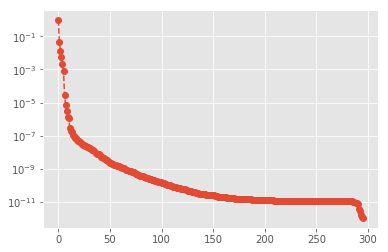

In [333]:
plt.semilogy(pca.explained_variance_ratio_, '--o')